1. Setup and Data loading

In [1]:
!pip install pandas-profiling
!pip install --upgrade pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 13.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b0847eed8e94cac16b0cfc9aff12cc0192fa3164d10cecd7b5fb221c3b26bf3f
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.3
    Uninstalling MarkupSafe-3.0.3:
      Successfully uninstalled MarkupSafe-3.0.3
  Attempting uninstall: 

In [2]:
!pip install -q ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.
imbalanced-learn 0.14.0 requires joblib<2,>=1.2.0, but you have joblib 1.1.1 which is incompatible.
scikit-learn 1.6.1 requires joblib>=1.2.0, but you have

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
import warnings
warnings.filterwarnings('ignore')

Data Loading

In [6]:
try:
    df = pd.read_csv('diabetes.csv')
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("⚠️ 'diabetes.csv' not found. Using dummy dataset for demo.")
    data = {
        'Pregnancies': [6, 1, 8, 1, 0],
        'Glucose': [148, 85, 183, 89, 137],
        'BloodPressure': [72, 66, 64, 66, 40],
        'SkinThickness': [35, 29, 0, 23, 35],
        'Insulin': [0, 0, 0, 94, 168],
        'BMI': [33.6, 26.6, 23.3, 28.1, 43.1],
        'DiabetesPedigreeFunction': [0.627, 0.351, 0.672, 0.167, 2.288],
        'Age': [50, 31, 32, 21, 33],
        'Outcome': [1, 0, 1, 0, 1]
    }
    df = pd.DataFrame(data)

print("\n📊 First 5 rows of the dataset:")
print(df.head())

print("\nℹ️ Dataset Info:")
df.info()

print("\n📈 Descriptive Statistics:")
print(df.describe().T)

⚠️ 'diabetes.csv' not found. Using dummy dataset for demo.

📊 First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

ℹ️ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------

 2. EXPLORATORY DATA ANALYSIS (EDA)


 2.1 Automated EDA Report

In [7]:
profile = ProfileReport(df, title="Pima Diabetes Data Profiling Report", explorative=True)
print("\n✅ Pandas Profiling Report generated (use .to_notebook_iframe() or save to HTML).")


✅ Pandas Profiling Report generated (use .to_notebook_iframe() or save to HTML).


2.2 Manual Visualizations

A. Target Variable Distribution

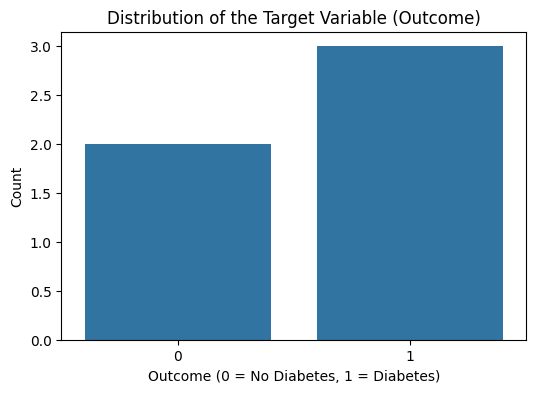


🎯 Target Class Distribution:
Outcome
1    3
0    2
Name: count, dtype: int64
Percentage with Diabetes (1): 60.00%


In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of the Target Variable (Outcome)')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()

print("\n🎯 Target Class Distribution:")
print(df['Outcome'].value_counts())
print(f"Percentage with Diabetes (1): {df['Outcome'].value_counts(normalize=True)[1]:.2%}")

 B. Feature Distributions (Histograms)

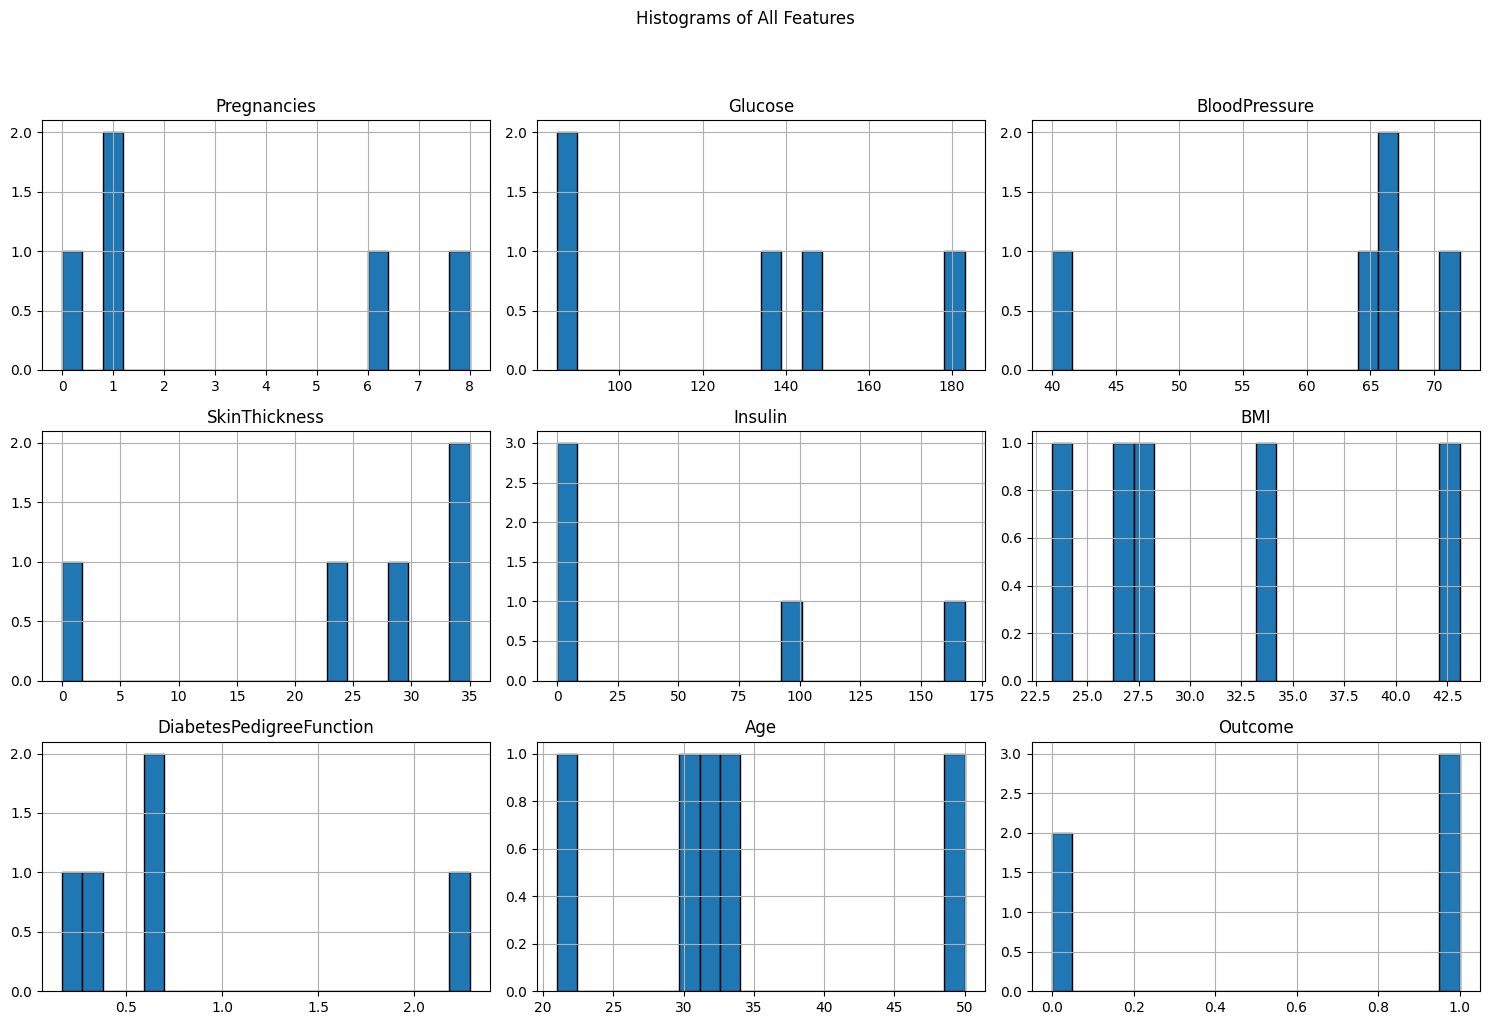

In [9]:
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of All Features', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

 C. Identifying Zero Values (Potential Missing Data)


🔍 Count of Zero values in key features:
Glucose: 0 (0.00%)
BloodPressure: 0 (0.00%)
SkinThickness: 1 (20.00%)
Insulin: 3 (60.00%)
BMI: 0 (0.00%)


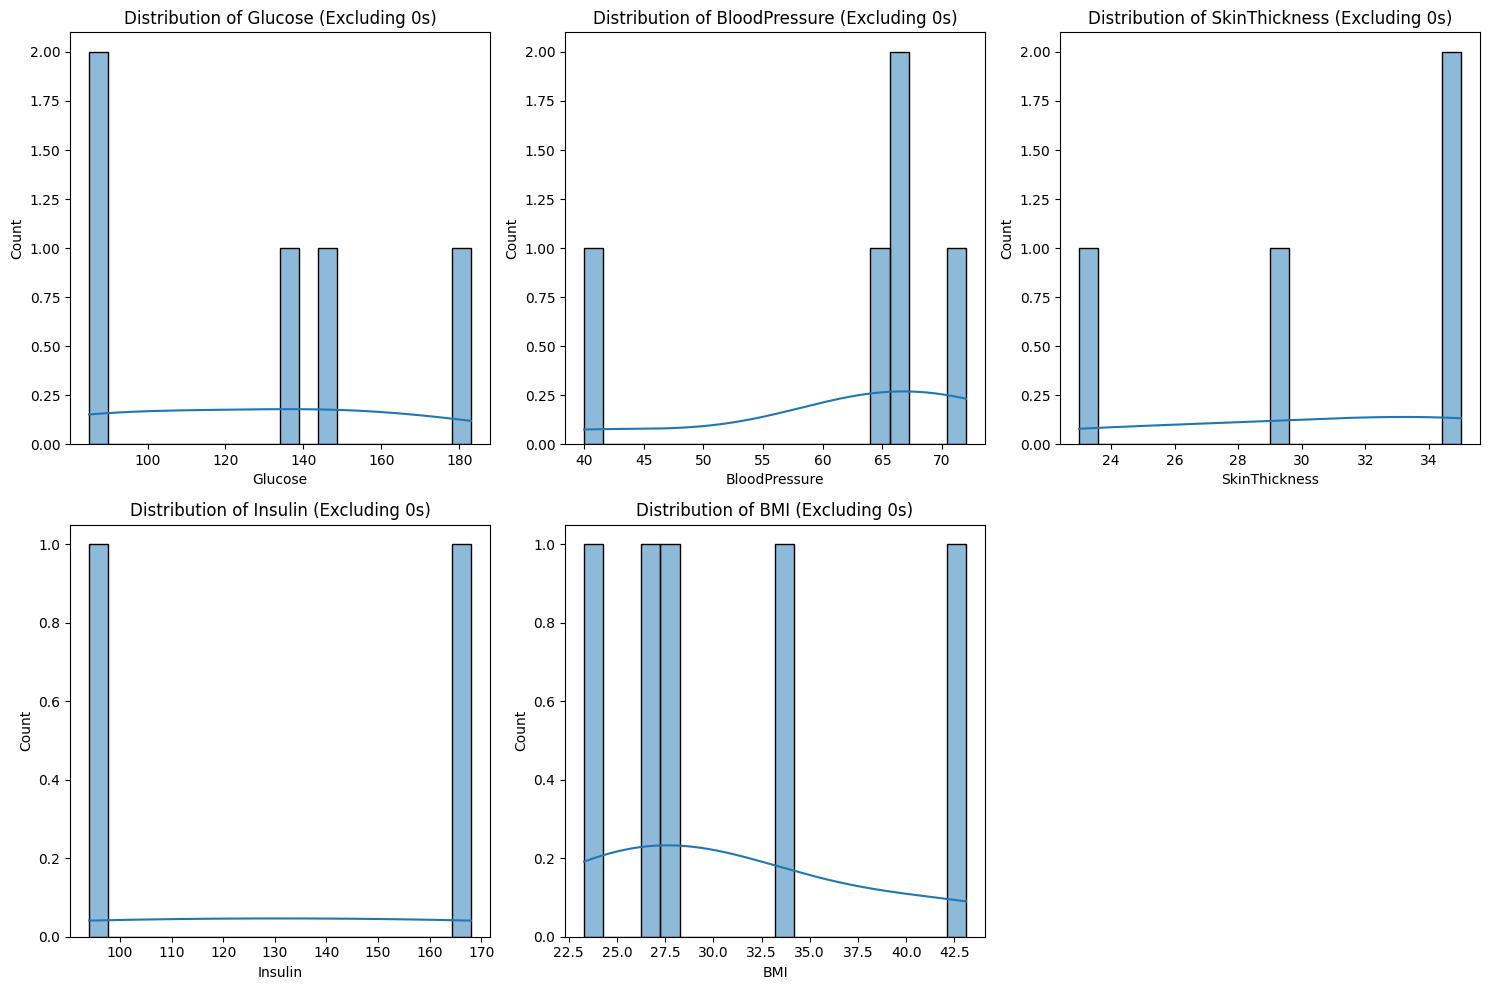

In [10]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("\n🔍 Count of Zero values in key features:")
for col in cols_with_zeros:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} ({(zero_count/len(df))*100:.2f}%)")

# Visualization of Zero-Value Distributions (excluding zeros)
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_with_zeros):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[df[col] != 0][col], kde=True, bins=20)
    plt.title(f'Distribution of {col} (Excluding 0s)')
plt.tight_layout()
plt.show()

D. Correlation Analysis (Heatmap)

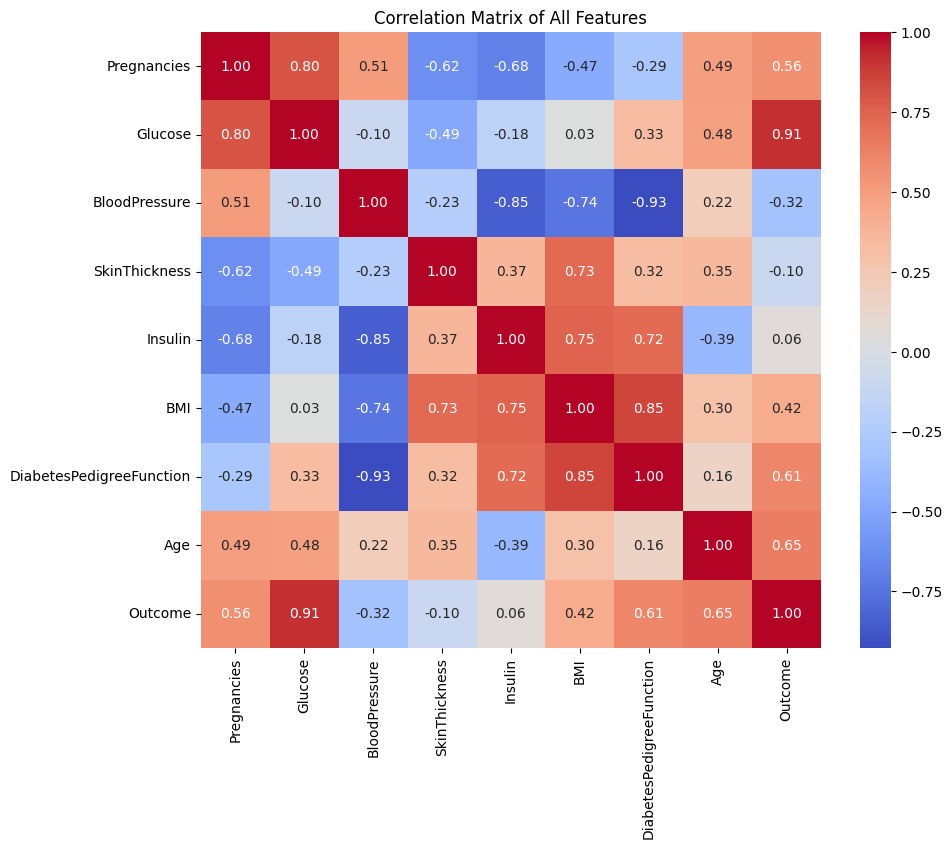

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features')
plt.show()

 3. DATA PREPROCESSING FOR ANN

 3.1 Imputation (Handling Zeros)

In [12]:
df_processed = df.copy()
for col in cols_with_zeros:
    median_val = df_processed[df_processed[col] != 0][col].median()
    df_processed[col] = df_processed[col].replace(0, median_val)

print("\n✅ Zero values imputed with the median of non-zero values.")
print("\n🔁 Checking for zero counts after imputation:")
for col in cols_with_zeros:
    print(f"{col}: {(df_processed[col] == 0).sum()}")


✅ Zero values imputed with the median of non-zero values.

🔁 Checking for zero counts after imputation:
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0


3.2 Feature Scaling (Standardization)

In [13]:
X = df_processed.drop('Outcome', axis=1)
y = df_processed['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

print("\n📋 --- Preprocessing Summary ---")
print(f"Original X_train shape: {X_train.shape}")
print(f"Scaled X_train shape: {X_train_scaled.shape}")
print("\nFirst 5 rows of Scaled Training Data (Standardized):")
print(X_train_scaled_df.head())


📋 --- Preprocessing Summary ---
Original X_train shape: (3, 8)
Scaled X_train shape: (3, 8)

First 5 rows of Scaled Training Data (Standardized):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.561951 -1.233338       0.790066      -1.372813 -1.224745 -0.403165   
1     1.404879  1.215967       0.620766       0.392232  0.000000 -0.972340   
2    -0.842927  0.017371      -1.410832       0.980581  1.224745  1.375505   

   DiabetesPedigreeFunction       Age  
0                 -0.967620 -1.410220  
1                 -0.409378  0.613139  
2                  1.376997  0.797081  


3.3 Visualization after Scaling

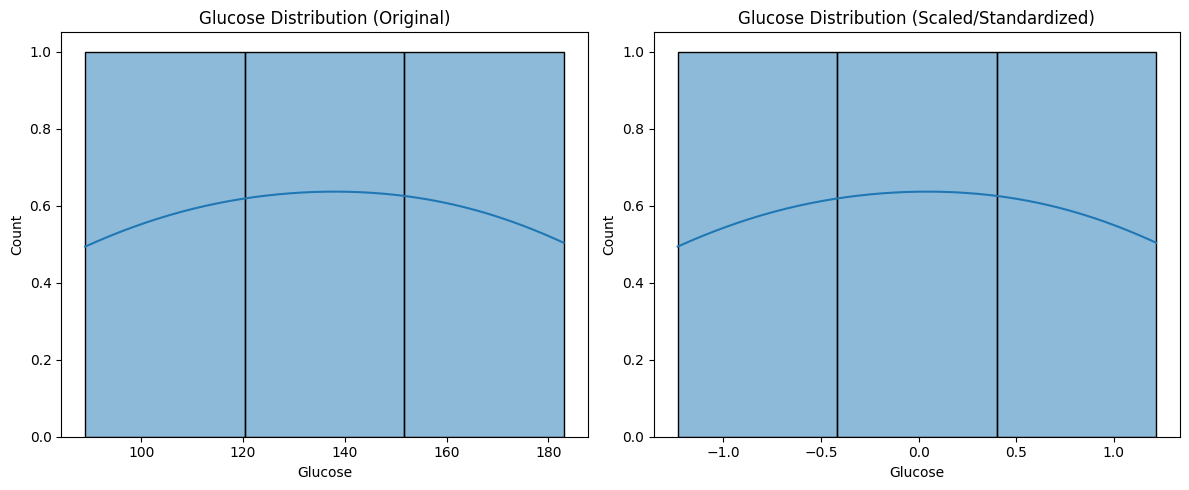


✅ Data is now preprocessed and ready for training an Artificial Neural Network (ANN).


In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(X_train['Glucose'], kde=True)
plt.title('Glucose Distribution (Original)')

plt.subplot(1, 2, 2)
sns.histplot(X_train_scaled_df['Glucose'], kde=True)
plt.title('Glucose Distribution (Scaled/Standardized)')

plt.tight_layout()
plt.show()

print("\n✅ Data is now preprocessed and ready for training an Artificial Neural Network (ANN).")